In [1]:
import jupman
jupman.init()

# Practical 8

In this practical we will will practice Pandas.

## Slides

The slides of the introduction can be found here: [Intro](docs/Practical8.pdf)

## Libraries installation


First things first. Let's start off by installing the required libraries. In particular we will need three libraries. Try and see if they are already available by typing in the console or in a python script:
```
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
```

if, upon execution, you do not get any error messages, you are sorted. Otherwise, you need to install them.

In **Linux** you can install the libraries by typing in a terminal ```sudo pip3 install matplotlib```, ```sudo pip3 install pandas``` and ```sudo pip3 install numpy```.

In **Windows** you can install the libraries by typing in the command prompt (to open it type ```cmd``` in the search) ```pip3 install matplotlib```, ```pip3 install pandas``` and ```pip install numpy```.

Install them in this order. You might not need to install numpy as matplot lib requires it. Once done that, try to perform the above imports again and they should work this time around.

## Pandas 
Pandas (the name comes from *panel data*) is a library to deal with numerical tables and time series. It is a quite complex library and here we will only scratch the surface of it. You can find a lot of information including the documentation on the [Pandas website](http://pandas.pydata.org). 

In particular the library pandas provides two data structures: **Series** and **DataFrames**.    

## Series

Series are 1-dimensional structures (like lists) containing data. Series are characterized by two types of information: the **values** and the **index** (a list of lables associated to the data), therefore they are a bit like a list and a bit like a dictionary. The index is optional and can be added by the library if not specified.

### How to define and access a Series

There are several ways to define a Series. We can specify both the values and the index esplicitly, or through a dictionary, or let python add the default index for us. We can access the index with the **Series.index** method and the values with the **Series.values**. 

In [2]:
import pandas as pd
import random

print("Values and index explicitly defined")
#values and index explicitely defined
S = pd.Series([random.randint(0,20) for x in range(0,10)], 
              index = list("ABCDEFGHIL"))

print(S)
print("The index:", S.index)
print("The values:", S.values)

print("------------------------\n")
print("From dictionary")
#from a dictionary
S1 = pd.Series({"one" : 1, "two" : 2, "ten": 10, 
                "three" : 3, "four": 4, "forty" : 40})
print(S1)
print(S1.index)
print(S1.values)
print("------------------------\n")
print("Default index")
#index added by default
myData = [random.randint(0,10) for x in range(10)]
S2 = pd.Series(myData)

print(S2)
print(S2.index)
print(S2.values)

print("------------------------\n")
print("Same value repeated")
S3 = pd.Series(1.27, range(10))
print(S3)
print(S3.index)
print(S3.values)

Values and index explicitly defined
A    15
B     7
C    20
D     3
E    15
F     1
G     5
H    17
I    15
L    17
dtype: int64
The index: Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'L'], dtype='object')
The values: [15  7 20  3 15  1  5 17 15 17]
------------------------

From dictionary
forty    40
four      4
one       1
ten      10
three     3
two       2
dtype: int64
Index(['forty', 'four', 'one', 'ten', 'three', 'two'], dtype='object')
[40  4  1 10  3  2]
------------------------

Default index
0    8
1    0
2    5
3    7
4    8
5    5
6    5
7    8
8    6
9    1
dtype: int64
RangeIndex(start=0, stop=10, step=1)
[8 0 5 7 8 5 5 8 6 1]
------------------------

Same value repeated
0    1.27
1    1.27
2    1.27
3    1.27
4    1.27
5    1.27
6    1.27
7    1.27
8    1.27
9    1.27
dtype: float64
RangeIndex(start=0, stop=10, step=1)
[ 1.27  1.27  1.27  1.27  1.27  1.27  1.27  1.27  1.27  1.27]


Data in a series can be accessed by using the **label** (i.e. the index) as in a dictionary or through its **position** as in a list. Slicing is also allowed both by **position** and **index**. In the latter case, ```S[S:E]``` with **S and E indexes**, both **S and E are included**. 

Passing a **list** of positions or indexes is also possible to retrieve some elements. **Head** and **tail** methods can also be used to retrieve the top or bottom N elements with **Series.head(N)** or **Series.tail(N)**.

<div class="alert alert-info">

**Note:** When the method returns more than one element, the return type is a Series.

</div>

In [3]:
import pandas as pd
import random

#values and index explicitely defined
S = pd.Series([random.randint(0,20) for x in range(0,10)], 
              index = list("ABCDEFGHIL"))
print(S)
print("")

print("Value at label \"A\":", S["A"])
print("Value at index 1:", S[1])
print("")

print("Slicing from 1 to 3:") #note 3 excluded
print(S[1:3])
print("")
print("Slicing from C to H:") #note H included!
print(S["C":"H"])
print("")

print("Retrieving from list:")
print(S[[1,3,5,7,9]])
print(S[["A","C","E","G"]])
print("")

print("Top 3")
print(S.head(3))
print("")
print("Bottom 3")
print(S.tail(3))

A     6
B    16
C     0
D     0
E     7
F     5
G     8
H     1
I     9
L    12
dtype: int64

Value at label "A": 6
Value at index 1: 16

Slicing from 1 to 3:
B    16
C     0
dtype: int64

Slicing from C to H:
C    0
D    0
E    7
F    5
G    8
H    1
dtype: int64

Retrieving from list:
B    16
D     0
F     5
H     1
L    12
dtype: int64
A    6
C    0
E    7
G    8
dtype: int64

Top 3
A     6
B    16
C     0
dtype: int64

Bottom 3
H     1
I     9
L    12
dtype: int64


### Operator broadcasting

Operations can automatically be broadcast to the entire Series. This is a quite cool feature and saves us from looping through the elements of the Series.

**Example:**
If we have a list of 10 integers and we want to divide them by 2. Without using pandas we would:


In [4]:
import random

listS = [random.randint(0,20) for x in range(0,10)]

print(listS)

for el in range(0,len(listS)):
    listS[el] /=2  #compact of X = X / 2
    
print(listS)

[9, 2, 16, 5, 15, 12, 11, 18, 20, 10]
[4.5, 1.0, 8.0, 2.5, 7.5, 6.0, 5.5, 9.0, 10.0, 5.0]


With pandas instead:

In [5]:
import pandas as pd
import random

S = pd.Series([random.randint(0,20) for x in range(0,10)], 
              index = list("ABCDEFGHIL"))

print(S)
print("")
S1 = S / 2
print(S1)

A    17
B    17
C    18
D    20
E    20
F    10
G     9
H     7
I     7
L     1
dtype: int64

A     8.5
B     8.5
C     9.0
D    10.0
E    10.0
F     5.0
G     4.5
H     3.5
I     3.5
L     0.5
dtype: float64


### Filtering

We can also apply boolean operators to obtain only the **sub-Series** with all the values satisfying a specific condition. This allows us to **filter** the Series.

Calling the boolean operator on the series alone (e.g. S > 10) will return a Series with True at the indexes where the condition is met, False at the others. Passing such a Series to a Series of the same lenght will return only the elements where the condition is True. Check the code below to see this in action.

In [6]:
import pandas as pd
import random

S = pd.Series([random.randint(0,20) for x in range(0,10)], 
              index = list("ABCDEFGHIL"))

print(S)
print("")
S1 = S>10
print(S1)
print("")
S2 = S[S > 10]
print(S2)

A     3
B     3
C    18
D     1
E    12
F    11
G     4
H    11
I     5
L    14
dtype: int64

A    False
B    False
C     True
D    False
E     True
F     True
G    False
H     True
I    False
L     True
dtype: bool

C    18
E    12
F    11
H    11
L    14
dtype: int64


### Missing data

Operations involving Series might have to deal with missing data or non-valid values (both cases are represented as  **NaN**, that is **not a number**). Operations are carried out by aligning the Series based on their **indexes**. Indexes not in common end up in NaN values. Although most the operations that can be performed on series quite happily deal with NaNs, it is possible to **drop** NaN values or to **fill** them (i.e. replace their value with some other value). The sytax is:
```
Series.dropna()
```
or
```
Series.fillna(some_value)
```
**Note that these operations do not modify the Series but rather return a new Series**.

In [7]:
import pandas as pd
import random

S = pd.Series([random.randint(0,10) for x in range(0,10)], 
              index = list("ABCDEFGHIL"))

S1 = pd.Series([random.randint(0,10) for x in range(0,8)], 
              index = list("DEFGHAZY"))

print("The dimensions of these Series:", S.shape)
print("")
print(S1)
print("---- S + S1 ----")
Ssum = S + S1
print(Ssum)
print("---- Dropping NaNs ----")
print(Ssum.dropna())
print("---- Filling NaNs ----")
print(Ssum.fillna("my_value"))

The dimensions of these Series: (10,)

D     5
E     7
F     9
G     7
H     7
A     3
Z    10
Y     7
dtype: int64
---- S + S1 ----
A     8.0
B     NaN
C     NaN
D     6.0
E    15.0
F    11.0
G    14.0
H    15.0
I     NaN
L     NaN
Y     NaN
Z     NaN
dtype: float64
---- Dropping NaNs ----
A     8.0
D     6.0
E    15.0
F    11.0
G    14.0
H    15.0
dtype: float64
---- Filling NaNs ----
A           8
B    my_value
C    my_value
D           6
E          15
F          11
G          14
H          15
I    my_value
L    my_value
Y    my_value
Z    my_value
dtype: object


### Computing stats

Pandas offer several operators to compute stats on the data stored in a Series. These include basic stats like **min**, **max** (and relative indexes with **argmin** and **argmax**) **mean**, **std**, **quantile** (to get the quantiles. A description of the data can be obtained by using the method **describe** and the counts for each value can be obtained by **value_counts**. Other methods available are **sum** and **cumsum** (for the sum and cumulative sum of the elements), **autocorr** and **corr** (for autocorrelation and correlation) and many others. For a complete list check the [Pandas reference](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html?highlight=series). 

**Note: as said before, when these methods do not return a single value, they return a Series.**

**Example:**
Fill the previous Series with the mean values of the series rather than NaNs.

In [8]:
Ssum = S + S1
print(Ssum)
print("---- Filling with avg value ----")
print(Ssum.fillna(Ssum.mean()))

A     8.0
B     NaN
C     NaN
D     6.0
E    15.0
F    11.0
G    14.0
H    15.0
I     NaN
L     NaN
Y     NaN
Z     NaN
dtype: float64
---- Filling with avg value ----
A     8.0
B    11.5
C    11.5
D     6.0
E    15.0
F    11.0
G    14.0
H    15.0
I    11.5
L    11.5
Y    11.5
Z    11.5
dtype: float64


Let's see some operators introduced above in action.

In [9]:
import pandas as pd
import random

S = pd.Series([random.randint(0,10) for x in range(0,10)], 
              index = list("ABCDEFGHIL"))
print("The data:")
print(S)
print("")
print("Its description")
print(S.describe())
print("")
print("Specifying different quantiles:")
print(S.quantile([0.1,0.2,0.8,0.9]))
print("")
print("Histogram:")
print(S.value_counts())
print("")
print("The type is a Series:")
print(type(S.value_counts()))
print("Summing the values:")
print(S.sum())
print("")
print("The cumulative sum:")
print(S.cumsum())

The data:
A     3
B     0
C     9
D    10
E     5
F     8
G     2
H    10
I    10
L    10
dtype: int64

Its description
count    10.000000
mean      6.700000
std       3.860052
min       0.000000
25%       3.500000
50%       8.500000
75%      10.000000
max      10.000000
dtype: float64

Specifying different quantiles:
0.1     1.8
0.2     2.8
0.8    10.0
0.9    10.0
dtype: float64

Histogram:
10    4
9     1
8     1
5     1
3     1
2     1
0     1
dtype: int64

The type is a Series:
<class 'pandas.core.series.Series'>
Summing the values:
67

The cumulative sum:
A     3
B     3
C    12
D    22
E    27
F    35
G    37
H    47
I    57
L    67
dtype: int64


**Example**:

Create two Series from the lists [2, 4, 6, 8, 10, 12, 13, 14, 15, 16], [1, 3, 5, 7, 9, 11, 13, 14, 15, 16] using the same index for both: ['9B47', '468B', 'B228', '3C52', 'AE2E', 'DFF6', 'C38B', '2CE5', '0325', '398F'].

Let's compare the distribution stats of the two Series (mean value, max, min, quantiles) and get the index and value of the positions where the two series are the same. Finally, let's get the sub-series where the first has an higher value than the first quartile of the second and compute its stats. 

In [10]:
import pandas as pd

L1 = [2, 4, 6, 8, 10, 12, 13, 14, 15, 16]
L2 = [1, 3, 5, 7, 9, 11, 13, 14, 15, 16]
I = ['9B47', '468B', 'B228', '3C52', 'AE2E', 'DFF6', 'C38B', '2CE5', '0325', '398F']
L1Series = pd.Series(L1,index = I)
L2Series = pd.Series(L2, index = I)
#Let's describe the stats
print("Stats of L1Series")
print(L1Series.describe())
print("")
print("Stats of L2Series")
print(L2Series.describe())
print("")
#This is a Series with boolean values (True means the two Series where the same)
Leq = L1Series == L2Series
print("Equality series")
print(Leq)
print("")
#Get the subseries where both are the same
Lsub = L1Series[Leq]
print("Subseries of identicals")
print(Lsub)
print("")
#Get the values that are the same
print("Identical values:")
print(Lsub.values)
print("")
#Get the indexes where the two series are the same
print("Indexes of identical values:")
print(Lsub.index)
print("")
firstQuartile = L2Series.quantile(0.25)
print("The first quartile of L2Series:",firstQuartile)
print("")
#Get the subseries in which L1 is bigger than L2
Lbig = L1Series[L1Series > firstQuartile]
print("The subseries with L1 > L2")
print(Lbig)

Stats of L1Series
count    10.000000
mean     10.000000
std       4.830459
min       2.000000
25%       6.500000
50%      11.000000
75%      13.750000
max      16.000000
dtype: float64

Stats of L2Series
count    10.00000
mean      9.40000
std       5.25357
min       1.00000
25%       5.50000
50%      10.00000
75%      13.75000
max      16.00000
dtype: float64

Equality series
9B47    False
468B    False
B228    False
3C52    False
AE2E    False
DFF6    False
C38B     True
2CE5     True
0325     True
398F     True
dtype: bool

Subseries of identicals
C38B    13
2CE5    14
0325    15
398F    16
dtype: int64

Identical values:
[13 14 15 16]

Indexes of identical values:
Index(['C38B', '2CE5', '0325', '398F'], dtype='object')

The first quartile of L2Series: 5.5

The subseries with L1 > L2
B228     6
3C52     8
AE2E    10
DFF6    12
C38B    13
2CE5    14
0325    15
398F    16
dtype: int64


## Plotting data

Using python's matplotlib it is possible to plot data. The basic syntax is ```Series.plot(kind = "type")``` the parameter ```kind``` can be used to produce several types of plots (examples include **line**, **hist**, **pie**, **bar**, see [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html) for all possible choices). Note that **matplotlib** needs to be imported and the pyplot needs to be shown with **pyplot.show()** to display the plot.

The data:
A    2
B    4
C    8
D    3
E    1
F    4
G    7
H    2
I    6
L    9
dtype: int64


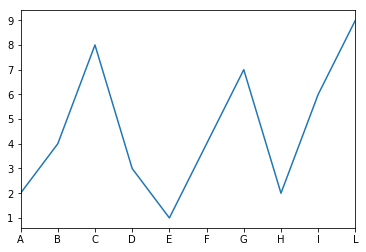

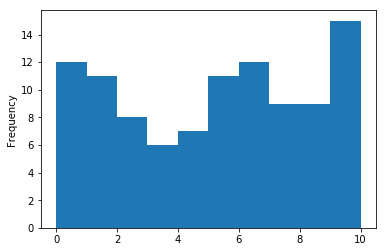

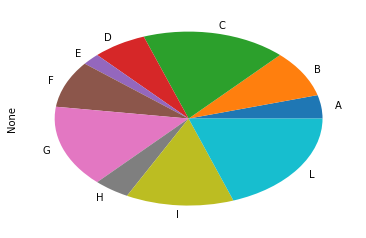

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import random 
S = pd.Series([random.randint(0,10) for x in range(0,10)], 
              index = list("ABCDEFGHIL"))
print("The data:")
print(S)
S1 = pd.Series([random.randint(0,10) for x in range(0,100)])

S.plot()
plt.show()
plt.close()
S1.plot(kind = "hist")
plt.show()
plt.close()
S.plot(kind = "pie")
plt.show()
plt.close()

**Example:** 
Let's create a series representing the sin, cos and sqrt functions and plot them.

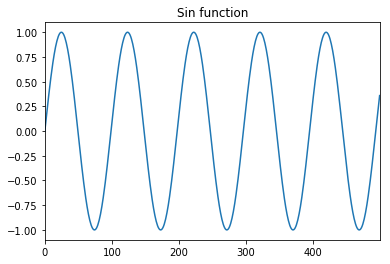

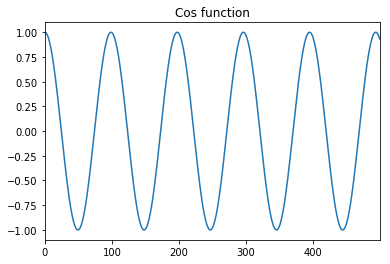

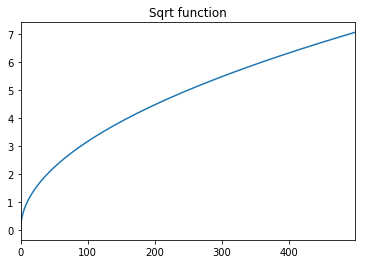

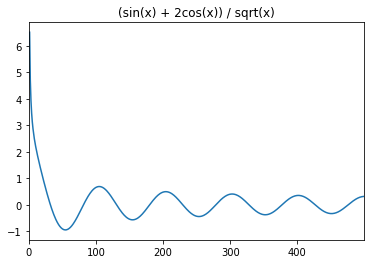

In [12]:
import math
import matplotlib.pyplot as plt
import pandas as pd

x = [i/10 for i in range(0,500)]


y =  [math.sin(2*i/3.14 ) for i in x]
y1 = [math.cos(2*i/3.14 ) for i in x]
y2 = [math.sqrt(i) for i in x]
#print(x)

ySeries = pd.Series(y)
ySeries1 = pd.Series(y1)
ySeries2 = pd.Series(y2)

ySeries.plot()
plt.title("Sin function")
plt.show()
plt.close()
ySeries1.plot()
plt.title("Cos function")
plt.show()
plt.close()
ySeries2.plot()
plt.title("Sqrt function")
plt.show()
plt.close()
ySeries2 = (ySeries + 2*ySeries1)/ySeries2
ySeries2.plot()
plt.title("(sin(x) + 2cos(x)) / sqrt(x)")
plt.show()


## Pandas DataFrames

DataFrames in pandas are the 2D analogous of Series. Dataframes are spreadsheet-like data structures with an ordered set of columns that can also be dishomogeneous. We can think about Dataframes as dictionaries of Series, each one representing a named column.
Dataframes are described by an **index** that contains the labels of rows and a **columns** structure that holds the labels of the columns.

**Note that the operation of extracting a column from a DataFrame returns a Series**. Moreover, most (but not all!) of the operations that apply to Series also apply to DataFrames.

### Define a DataFrame

There are several different ways to define a DataFrame. It is possible to create a DataFrame starting from a dictionary having Series as values. In this case, they **keys** of the dictionary are the **columns** of the DataFrame.

In [13]:
import pandas as pd

myData = {
    "temperature" : pd.Series([1, 3, 8, 13, 17, 20, 22, 22,18 ,13,6,2],
                            index = ["Jan","Feb", "Mar","Apr","May","Jun",
                                     "Jul","Aug","Sep","Oct","Nov","Dec"]
                             ),
    "dayLength" : pd.Series([9.7, 10.9, 12.5, 14.1, 15.6, 16.3, 15.9,
                             14.6,13,11.4,10,9.3],
                            index = ["Jan","Feb", "Mar","Apr","May","Jun",
                                     "Jul","Aug","Sep","Oct","Nov","Dec"]
                             )
    
}

DF = pd.DataFrame(myData)
print(DF)

print(DF.columns)
print(DF.index)

     dayLength  temperature
Jan        9.7            1
Feb       10.9            3
Mar       12.5            8
Apr       14.1           13
May       15.6           17
Jun       16.3           20
Jul       15.9           22
Aug       14.6           22
Sep       13.0           18
Oct       11.4           13
Nov       10.0            6
Dec        9.3            2
Index(['dayLength', 'temperature'], dtype='object')
Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object')


If the index is not specified, it is given by default:

    dayLength  temperature
0         9.7            1
1        10.9            3
2        12.5            8
3        14.1           13
4        15.6           17
5        16.3           20
6        15.9           22
7        14.6           22
8        13.0           18
9        11.4           13
10       10.0            6
11        9.3            2
RangeIndex(start=0, stop=12, step=1)


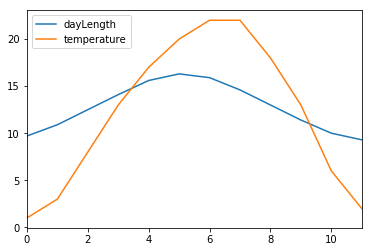

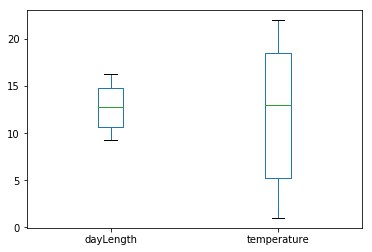

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

myData = {
    "temperature" : pd.Series([1, 3, 8, 13, 17, 20, 
                               22, 22,18 ,13,6,2]),
    "dayLength" : pd.Series([9.7, 10.9, 12.5, 14.1, 15.6, 
                             16.3,15.9,14.6,13,11.4,10,9.3])
    
}

DF = pd.DataFrame(myData)
print(DF)
print(DF.index)

DF.plot()
plt.show()
plt.close()
DF.plot(kind ="box")
plt.show()

It is also possible to define a DataFrame from a list of dictionaries holding a set of values rather than Series. Note that when columns do not have the corresponding information a NaN is added.
Indexes and columns can be changed after they have been defined.

In [15]:
import pandas as pd

myData = [{"A" : 1, "B" : 2, "C" : 3.2, "D" : 10},
          {"A" : 1, "B" : 2, "F" : 3.2, "G" : 10, "H":1},
          {"A" : 1, "B" : 2, "C" : 3.2, "D" : 1, 
           "E": 4.1, "F" : 3.2, "G" : 10, "H":1}
          
         ]

DF = pd.DataFrame(myData)
print(DF)
print("")
#Let's change the columns and indexes
columns = "val1,val2,val3,val4,val5,val6,val7,val8".split(',')
inds = ["Day1", "Day2", "Day3"]

DF.columns = columns
DF.index = inds
print(DF)

   A  B    C     D    E    F     G    H
0  1  2  3.2  10.0  NaN  NaN   NaN  NaN
1  1  2  NaN   NaN  NaN  3.2  10.0  1.0
2  1  2  3.2   1.0  4.1  3.2  10.0  1.0

      val1  val2  val3  val4  val5  val6  val7  val8
Day1     1     2   3.2  10.0   NaN   NaN   NaN   NaN
Day2     1     2   NaN   NaN   NaN   3.2  10.0   1.0
Day3     1     2   3.2   1.0   4.1   3.2  10.0   1.0


### Loading data from external files 

Pandas also provide methods to load data from external files. In particular, to load data from a .cvs file, we can use the method ```pandas.read_csv(filename)```. This method has a lot of parameters, you can see all the details on its usage on the [official documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv). Some useful optional parameters are the **separator** (to specify the column separator like ```sep="\t"``` for tab separated files), the character to identify comments (```comment="#"```) or that to skip some lines (like the header for example or any initial comments to the file) ```skiprows=N```.  The rows to use as column header can be specified with the parameter ```header``` that accepts a number or a list of numbers. Similarly, the columns to use as index can be specified with the parameter ```index_col```.

Other methods to read data in are ```pandas.read_excel(filename)``` that works in a similar way but can load excel files (see [here](http://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.read_excel.html)). 

**Example:** 
Let's load the data stored in a csv datafile [sampledata_orders.csv](file_samples/sampledata_orders.csv) in a pandas DataFrame. 

In [16]:
import pandas as pd

orders = pd.read_csv("file_samples/sampledata_orders.csv", 
                     sep=",", index_col = 0, header = 0)
print("First 5 entries:")
print(orders.head())
print("")
print("The index:")
print(orders.index)
print("")
print("The column names:")
print(orders.columns)
print("")
print("A description of the numerical values:")
print(orders.describe())




First 5 entries:
        Order ID  Order Date Order Priority  Order Quantity       Sales  \
Row ID                                                                    
1              3  10/13/2010            Low               6    261.5400   
49           293   10/1/2012           High              49  10123.0200   
50           293   10/1/2012           High              27    244.5700   
80           483   7/10/2011           High              30   4965.7595   
85           515   8/28/2010  Not Specified              19    394.2700   

        Discount       Ship Mode   Profit  Unit Price  Shipping Cost  \
Row ID                                                                 
1           0.04     Regular Air  -213.25       38.94          35.00   
49          0.07  Delivery Truck   457.81      208.16          68.02   
50          0.01     Regular Air    46.71        8.69           2.99   
80          0.08     Regular Air  1198.97      195.99           3.99   
85          0.08     Regu

### Extract values by row and column

Once a DataFrame is populated we can access its content. Several options are available:
    
1. Select by column ```DataFrame[col]``` returns a Series

2. Select by row label ```DataFrame.loc[row_label]``` returns a Series

3. Select row by integer location ```DataFrame.iloc[col]``` returns a Series

4. Slice rows ```DataFrame[S:E]``` (S and E are labels, both included) returns a DataFrame

5. Select rows by boolean vector ```DataFrame[bool_vect]``` returns a DataFrame

**Note that if names are well formed (i.e. no spaces, no strange characters...**) we can use DataFrame.col instead of DataFrame[col].
Here are some ways to extract data from the orders dataframe:

In [17]:
import pandas as pd

orders = pd.read_csv("file_samples/sampledata_orders.csv", sep=",", index_col =0, header=0)

print("The Order Quantity column (top 5)")
print(orders["Order Quantity"].head(5))
print("")
print("The Sales column (top 10)")
print(orders.Sales.head(10))
print("")
print("The row with ID:50")
r50 = orders.loc[50]
print(r50)
print("")
print("The third row:")
print(orders.iloc[3])

print("The Order Quantity, Sales, Discount and Profit of the 2nd,4th, 6th and 8th row:")
print(orders[1:8:2][["Order Quantity", "Sales","Discount", "Profit"]])
print("The Order Quantity, Sales, Discount and  Profit of orders with discount > 10%:")
print(orders[orders["Discount"] > 0.1][["Order Quantity", "Sales","Discount", "Profit"]])

The Order Quantity column (top 5)
Row ID
1      6
49    49
50    27
80    30
85    19
Name: Order Quantity, dtype: int64

The Sales column (top 10)
Row ID
1        261.5400
49     10123.0200
50       244.5700
80      4965.7595
85       394.2700
86       146.6900
97        93.5400
98       905.0800
103     2781.8200
107      228.4100
Name: Sales, dtype: float64

The row with ID:50
Order ID                                                             293
Order Date                                                     10/1/2012
Order Priority                                                      High
Order Quantity                                                        27
Sales                                                             244.57
Discount                                                            0.01
Ship Mode                                                    Regular Air
Profit                                                             46.71
Unit Price                       

### Broadcasting, filtering and computing stats

These work pretty much like on Series and pandas takes care of adding NaNs when it cannot perform some operations due to missing values and so on. 

Obviously some operators, when applied to entire tables might not always make sense (like mean or sum of strings).

In [18]:
import pandas as pd

orders = pd.read_csv("file_samples/sampledata_orders.csv", sep=",", index_col =0, header=0)

orders_10 = orders[["Sales","Profit", "Product Category"]].head(10)
orders_5 = orders[["Sales","Profit", "Product Category"]].head()
orders_20 = orders[["Sales","Profit", "Product Category"]].head(20)
print(orders_20)
print("")

#Summing over the entries, does not make sense but...
print("Top10 + Top5:")
print(orders_10 + orders_5)
print("")

prod_cost = orders_20["Sales"] - orders_20["Profit"]
print(prod_cost)

print("")
print("Technology orders")
print(orders_20[orders_20["Product Category"] == "Technology"])
print("")
print("Office Supplies positive profit")
print(orders_20[ (orders_20["Product Category"] == "Office Supplies") & (orders_20["Profit"] >0) ])

             Sales   Profit Product Category
Row ID                                      
1         261.5400  -213.25  Office Supplies
49      10123.0200   457.81  Office Supplies
50        244.5700    46.71  Office Supplies
80       4965.7595  1198.97       Technology
85        394.2700    30.94  Office Supplies
86        146.6900     4.43        Furniture
97         93.5400   -54.04  Office Supplies
98        905.0800   127.70  Office Supplies
103      2781.8200  -695.26  Office Supplies
107       228.4100  -226.36  Office Supplies
127       196.8500  -166.85  Office Supplies
128       124.5600   -14.33  Office Supplies
134       716.8400   134.72  Office Supplies
135      1474.3300   114.46       Technology
149        80.6100    -4.72  Office Supplies
160      1815.4900   782.91        Furniture
161       248.2600    93.80  Office Supplies
175      4462.2300   440.72        Furniture
176       663.7840  -481.04        Furniture
203       834.9040   -11.68       Technology

Top10 + T

Statistics can be computed by **column** (normally the default) or by **row** (specifying ```axis=1```)  or on the **entire table**.

[Here](http://pandas.pydata.org/pandas-docs/version/0.20/api.html#api-dataframe-stats) you can find a complete list of methods that can be applied.

In [19]:
import pandas as pd

data = pd.read_csv("file_samples/random.csv", sep=",", header=0)

print("Global description")
print(data.describe())
print("")

print(data)
print("")

print("Let's reduce A in [0,1]")
print(data["A"]/ data["A"].max())

print("Let's reduce first row in [0,1]")
print(data.iloc[0]/ data.loc[0].max())

print("Mean and std values (by column)")
print(data.mean())
print(data.std())
print("")
print("Mean and std values (by column) - top 10 values")
print(data.head(10).mean(axis=1))
print(data.head(10).std(axis=1))

print("Cumulative sum (by column)- top 10 rows")
print(data.head(10).cumsum())

print("Cumulative sum (by row) - top 10 rows")
print(data.head(10).cumsum(axis = 1 ))

Global description
               A          B           C          D           E          F  \
count  50.000000  50.000000   50.000000  50.000000   50.000000  50.000000   
mean   45.240000  49.760000   54.120000  50.500000   57.860000  49.180000   
std    28.393417  32.193015   25.165282  28.321226   32.443364  28.488229   
min     0.000000   0.000000    5.000000   1.000000    2.000000   1.000000   
25%    21.750000  18.000000   35.750000  28.250000   29.250000  25.000000   
50%    42.000000  49.500000   52.500000  49.500000   68.000000  52.000000   
75%    63.250000  76.250000   73.750000  76.000000   86.750000  75.500000   
max    99.000000  99.000000  100.000000  95.000000  100.000000  97.000000   

                G         H          I           L  
count   50.000000  50.00000  50.000000   50.000000  
mean    49.780000  47.78000  46.920000   51.780000  
std     29.673248  29.75978  31.056788   30.613649  
min      1.000000   1.00000   0.000000    3.000000  
25%     26.500000  24.


### Merging DataFrames

It is possible to merge together DataFrames having a common column name. The merge can be done with the pandas ```merge``` method. Upon merging, the two tables will be concatenated into a bigger one containing information from both DataFrames. The basic syntax is: 

```
pandas.merge(DataFrame1, DataFrame2, on="col_name", how="inner/outer/left/right")
```

The column on which perform the merge is specified with the parameter ```on``` followed by the column name, while the behaviour of the merging depends on the parameter ```how``` that tells pandas how to behave when dealing with non-matching data. In particular:
    
    1. how = inner : non-matching entries are discarded;
    2. how = left : ids are taken from the first DataFrame;
    3. how = right : ids are taken from the second DataFrame;
    4. how = outer : ids from both are retained.



In [20]:
import pandas as pd

Snp1 = {"id": ["SNP_FB_0411211","SNP_FB_0412425","SNP_FB_0942385", "CH09f09","Hi05f12x","SNP_FB_0942385" ],
        "type" : ["SNP","SNP","SNP","SSR","SSR","SNP"]        
       }
Snp2 = {"id" : ["SNP_FB_0411211","SNP_FB_0412425","SNP_FB_0942385", "CH01f09","SNP_FB_0428218" ],
      "chr" : ["1", "15","7","9","1"]
     }

DFs1 = pd.DataFrame(Snp1)
DFs2 = pd.DataFrame(Snp2)

print(DFs1)
print(DFs2)
print("")
print("inner join (only common in both)")
inJ = pd.merge(DFs1,DFs2, on = "id", how = "inner")
print(inJ)
print("")
print("Left join (IDS from DFs1)")
leftJ = pd.merge(DFs1,DFs2, on = "id", how = "left")
print(leftJ)
print("")
print("Right join (IDS from DFs2)")
rightJ = pd.merge(DFs1,DFs2, on = "id", how = "right")
print(rightJ)
print("")
print("Outer join (IDS from both)")
outJ = pd.merge(DFs1,DFs2, on = "id", how = "outer")
print(outJ)

               id type
0  SNP_FB_0411211  SNP
1  SNP_FB_0412425  SNP
2  SNP_FB_0942385  SNP
3         CH09f09  SSR
4        Hi05f12x  SSR
5  SNP_FB_0942385  SNP
  chr              id
0   1  SNP_FB_0411211
1  15  SNP_FB_0412425
2   7  SNP_FB_0942385
3   9         CH01f09
4   1  SNP_FB_0428218

inner join (only common in both)
               id type chr
0  SNP_FB_0411211  SNP   1
1  SNP_FB_0412425  SNP  15
2  SNP_FB_0942385  SNP   7
3  SNP_FB_0942385  SNP   7

Left join (IDS from DFs1)
               id type  chr
0  SNP_FB_0411211  SNP    1
1  SNP_FB_0412425  SNP   15
2  SNP_FB_0942385  SNP    7
3         CH09f09  SSR  NaN
4        Hi05f12x  SSR  NaN
5  SNP_FB_0942385  SNP    7

Right join (IDS from DFs2)
               id type chr
0  SNP_FB_0411211  SNP   1
1  SNP_FB_0412425  SNP  15
2  SNP_FB_0942385  SNP   7
3  SNP_FB_0942385  SNP   7
4         CH01f09  NaN   9
5  SNP_FB_0428218  NaN   1

Outer join (IDS from both)
               id type  chr
0  SNP_FB_0411211  SNP    1
1  SNP_FB_0412

### Grouping

Given a DataFrame, it is possible to apply the so called **split-apply-aggregate** processing method. Basically, this helps to group the data according to the value of some columns, apply a function on the different groups and aggregate the results in a new DataFrame.

Grouping of a DataFrame can be done by using the **DataFrame.groupby(columnName)** method which returns a ```pandas.DataFrameGroupBy``` object, which basically is composed of two information the **name** shared by each group and a **DataFrame** containing all the elements belonging to that group.

Given a grouped DataFrame, each group can be obtained with the **get_group(groupName)** it is also possible to loop over the groups:
```
for groupName, groupDataFrame in grouped:
    #do something
```
It is also possible to aggregate the groups by applying some functions to each of them (please refer to the [documentation](http://pandas.pydata.org/pandas-docs/version/0.20/api.html#api-dataframe-stats).

Let's see these things in action.
**Example** 
Given the orders data seen above, let's get the columns "Sales", "Profit" and "Product Category" and compute the total sum and the mean of the sales and profits for each product category. 

             Sales   Profit Product Category
Row ID                                      
1         261.5400  -213.25  Office Supplies
49      10123.0200   457.81  Office Supplies
50        244.5700    46.71  Office Supplies
80       4965.7595  1198.97       Technology
85        394.2700    30.94  Office Supplies


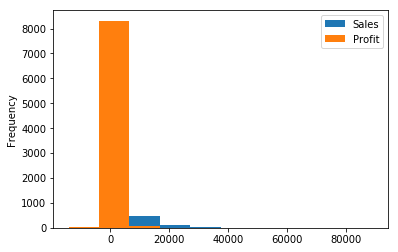


Group:  Furniture
Group:  Office Supplies
Group:  Technology

Count elements per category:
Office Supplies    4610
Technology         2065
Furniture          1724
Name: Product Category, dtype: int64

Total values:
                        Sales     Profit
Product Category                        
Furniture         5178590.542  117433.03
Office Supplies   3752762.100  518021.42
Technology        5984248.182  886313.52
Mean values (sorted by profit):
                        Sales      Profit
Product Category                         
Furniture         3003.822820   68.116607
Office Supplies    814.048178  112.369072
Technology        2897.941008  429.207516

The most profitable is Technology


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

orders = pd.read_csv("file_samples/sampledata_orders.csv", sep=",", index_col =0, header=0)

SPC = orders[["Sales","Profit", "Product Category"]]
print(SPC.head())

SPC.plot(kind = "hist", bins = 10)
plt.show()

print("")
grouped = SPC.groupby("Product Category")
for i,g in grouped:
    print("Group: ", i)

print("")
print("Count elements per category:") #get the series corresponding to the column
                                      #and apply the value_counts() method
print(orders["Product Category"].value_counts())    
print("")
print("Total values:")
print(grouped.aggregate(pd.DataFrame.sum))

print("Mean values (sorted by profit):")
mv_sorted = grouped.aggregate(pd.DataFrame.mean).sort_values(by="Profit")
print(mv_sorted)
print("")
print("The most profitable is {}".format(mv_sorted.index[-1]))


## Exercises


1. The file [filt_aligns.tsv](file_samples/filt_aligns.tsv) is a tab separated value file representing alignments of paired-end reads on some apple chromosomes. Paired end reads have the property of being X bases apart from each other as they have been sequenced from the two ends of some size-selected DNA molecules. 

![](img/pract8/pe.png)

Each line of the file has the following information ```readID\tChrPE1\tAlignmentPosition1\tChrPE2\tAlignmentPosition2```. The two ends of the same pair have the same readID. Load the read pairs aligning on the same chromosome into two dictionaries. The first (```inserts```) having readID as keys and the insert size (i.e. the absolute value of AlignmentPosition1 - AlignmentPosition2) as value. The second dictionary (```chrs```)will have readID as key and chromosome ID as value.
Example:
```
readID Chr11 31120 Chr11 31472
readID1 Chr7 12000 Chr11 11680
```
will result in:
```
inserts = {"readID" : 352, "readID1" : 320}
chrs = {"readID" : "Chr11", "readID1" : "Chr7"} 

```
Once you have the two dictionaries:
    1. create a Series with all the insert sizes and show see some of its stats with the method **describe**. What is the mean insert size? How many paried end are we using to create this distribution?
    2. Display the first 5 values of the series
    3. Make a box plot to assess the distribution of the values.
    4. Make an histogram to see the values in a different way. How does this distribution look like?
    5. Create another series from the chromosome info and plot the first 10 elements
    6. Create a DataFrame starting from the two Series and plot the first 10 elements
    7. For each chromosome, get the average insert size of the paired aligned to it (hint:use group by). 

<div class="tggle" onclick="toggleVisibility('ex1');">Show/Hide Solution</div>
<div id="ex1" style="display:none;">

count    246499.000000
mean        194.126950
std          70.277551
min           0.000000
25%         150.000000
50%         189.000000
75%         232.000000
max         605.000000
dtype: float64
First five elements:
HWI-ST1296:67:C2F0FACXX:6:1101:10005:3936     208
HWI-ST1296:67:C2F0FACXX:6:1101:10099:72796    131
HWI-ST1296:67:C2F0FACXX:6:1101:10105:69482    260
HWI-ST1296:67:C2F0FACXX:6:1101:10147:69351    172
HWI-ST1296:67:C2F0FACXX:6:1101:10180:92885    221
dtype: int64


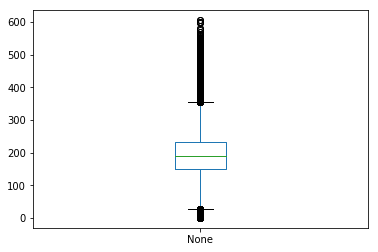

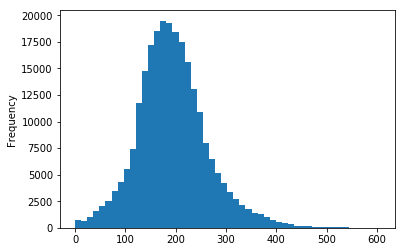

HWI-ST1296:67:C2F0FACXX:6:1101:10005:3936      Chr7
HWI-ST1296:67:C2F0FACXX:6:1101:10099:72796     Chr9
HWI-ST1296:67:C2F0FACXX:6:1101:10105:69482     Chr1
HWI-ST1296:67:C2F0FACXX:6:1101:10147:69351    Chr10
HWI-ST1296:67:C2F0FACXX:6:1101:10180:92885    Chr11
HWI-ST1296:67:C2F0FACXX:6:1101:10182:4264     Chr12
HWI-ST1296:67:C2F0FACXX:6:1101:10199:77453    Chr12
HWI-ST1296:67:C2F0FACXX:6:1101:10284:26046    Chr13
HWI-ST1296:67:C2F0FACXX:6:1101:10331:55976    Chr17
HWI-ST1296:67:C2F0FACXX:6:1101:10373:39388    Chr12
dtype: object
                                             chrs  inserts
HWI-ST1296:67:C2F0FACXX:6:1101:10005:3936    Chr7      208
HWI-ST1296:67:C2F0FACXX:6:1101:10099:72796   Chr9      131
HWI-ST1296:67:C2F0FACXX:6:1101:10105:69482   Chr1      260
HWI-ST1296:67:C2F0FACXX:6:1101:10147:69351  Chr10      172
HWI-ST1296:67:C2F0FACXX:6:1101:10180:92885  Chr11      221
HWI-ST1296:67:C2F0FACXX:6:1101:10182:4264   Chr12      314
HWI-ST1296:67:C2F0FACXX:6:1101:10199:77453  Chr12    

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

f = open("file_samples/filt_aligns.tsv")
inserts = dict()
chrs = dict()

for line in f:
    line = line.strip()
    infos = line.split("\t")
    if(infos[1] == infos[3]):
        inserts[infos[0]] = abs(int(infos[2]) - int(infos[4]))
        chrs[infos[0]] = infos[1] # or infos[3], they are the same!

inSeries = pd.Series(inserts)
print(inSeries.describe())
print("First five elements:")
print(inSeries.head(5))
inSeries.plot(kind = "box")
plt.show()
inSeries.plot(kind = "hist", bins = 50)
plt.show()

chrSeries = pd.Series(chrs)
print(chrSeries.head(10))

DF = pd.DataFrame({"inserts": inSeries,"chrs" : chrSeries})
print(DF.head(10))

grouped = DF.groupby("chrs")
print("Average insert size by Chr:")
print(grouped.aggregate(pd.DataFrame.mean).sort_index())

</div>

2.Download the [train.csv](file_samples/train.csv) dataset. As the name says it is a .csv file. The file contains information regarding loans given or refused to applicants. Information on the gender, marital status, education, work and income of the applicant is reported alongside the amount and length of the loan and credit history (i.e. 0 if no previous loan was given, 1 otherwise). Open it in a text editor or excel and inspect it first. Then, answer the following questions (if you have any doubts check [here](http://pandas.pydata.org/pandas-docs/version/0.20/api.html)):

    0. Load it into a pandas DataFrame (use column ```Loan_ID``` as index. Hint: use parm index_col).
    1. Get an idea of the data by visualizing its first 5 entries; 
    2. How many total entries are present in the file? How many males and females?
    3. What is the average applicant income? Does the gender affect the income? Compute the average of the
    applicant income on the whole dataset and the average of the data grouped by Gender. How many Females have an income > than the average?
    4. How many loans have been given (i.e. Loan_Status equals Y)? What is the percentage of the loans given and that of the loans refused?
    5. What is the percentage of given/refused loans in the case of married people?
    6. What is the percentage of given/refused loans in the case of applicants with positive credit history (i.e. Credit_History equals 1)?
    

<div class="tggle" onclick="toggleVisibility('ex2');">Show/Hide Solution</div>
<div id="ex2" style="display:none;">

         Gender Married Dependents     Education Self_Employed  \
Loan_ID                                                          
LP001002   Male      No          0      Graduate            No   
LP001003   Male     Yes          1      Graduate            No   
LP001005   Male     Yes          0      Graduate           Yes   
LP001006   Male     Yes          0  Not Graduate            No   
LP001008   Male      No          0      Graduate            No   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                                                      
LP001002             5849                0.0         NaN             360.0   
LP001003             4583             1508.0       128.0             360.0   
LP001005             3000                0.0        66.0             360.0   
LP001006             2583             2358.0       120.0             360.0   
LP001008             6000                0.0       141.0             

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


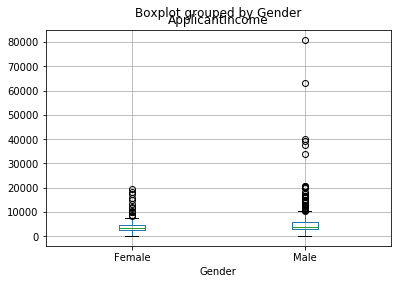

Female applicants with income higher than avg (5403.459283387622): 21
          Gender  ApplicantIncome
Loan_ID                          
LP001186  Female            11500
LP001392  Female             7451
LP001422  Female            10408
LP001516  Female            14866
LP001519  Female            10000
LP001708  Female            10000
LP001776  Female             8333
LP001871  Female             7200
LP001945  Female             5417
LP002142  Female             5500
LP002194  Female            15759
LP002231  Female             6000
LP002301  Female             7441
LP002377  Female             8624
LP002393  Female            10047
LP002407  Female             7142
LP002582  Female            17263
LP002634  Female            13262
LP002731  Female            18165
LP002813  Female            19484
LP002959  Female            12000

The number of given loans is: 422

The percentage of loans is the following
Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64
398
The p

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("file_samples/train.csv", index_col = "Loan_ID")
#Question 1:
print(train.head())
#Question 2:
print("")
entries = train.shape[0]
print("The toal number of entries is {}".format(entries))
print("")
print("Males and Females")
print(train["Gender"].value_counts())

#Question 3:
print("")
avgIncome = train["ApplicantIncome"].mean()
print("The average income is {}".format(avgIncome))
train[["Gender", "ApplicantIncome"]].groupby("Gender").mean()
train.boxplot(column = "ApplicantIncome", by = "Gender")
plt.show()
females = train[train["Gender"] == "Female"]
fhi = females[females["ApplicantIncome"] > avgIncome][["Gender","ApplicantIncome"]]

print("Female applicants with income higher than avg ({}): {}".format(avgIncome,len(fhi)))
print(fhi)
print("")
#Question 4: 
loanSt = train["Loan_Status"].value_counts()
print("The number of given loans is: {}".format(loanSt["Y"]))
#loanSt is a Series, I can apply operator broadcasting on it
#to get the percentage
loanSt = loanSt / entries
print("")
print("The percentage of loans is the following")
print(loanSt)

#Question 5: 
loanSt =  train[train["Married"] == "Yes"]["Loan_Status"].value_counts()
married = train["Married"][train["Married"] == "Yes"].count()
print(married)
print("The percentage of loans to married people ({} applicants)".format(married))
print(loanSt/married)

#Question 6: 
loanSt =  train[train["Credit_History"] == 1]["Loan_Status"].value_counts()
chist = train["Credit_History"][train["Credit_History"] == 1].count()
print(chist)
print("The percentage of loans to applicants with credit history ({} applicants)".format(chist))
print(loanSt/chist)


</div>

3. [Acknowledgements to Stefano Teso] DNA transcription and translation into proteins follows this schema:

![](img/pract8/genestructure.jpg)


The file [gene_table.csv](file_samples/gene_table.csv) is a comma separated value file representing a summary of the annotation of several human genes based on the [Ensembl](http://www.ensembl.org/index.html) annotation. For each gene it contains the following information:
```
gene_name,gene_biotype,chromosome,strand,transcript_count
```
where ```gene_name``` is based on the [HGNC](http://www.genenames.org/) nomenclature. ```gene_biotype``` represents the biotype (refer to [VEGA](http://vega.sanger.ac.uk/info/about/gene_and_transcript_types.html) like protein_coding, pseudogene, lincRNA, miRNA etc. ```chromosome``` is where the feature is located, ```strand``` is a + or a - for the forward or reverse strand and ```transcript_count``` reports the number of isoforms of the gene.

A sample of the file follows:
```
TSPAN6,protein_coding,chrX,-,5
TNMD,protein_coding,chrX,+,2
DPM1,protein_coding,chr20,-,6
SCYL3,protein_coding,chr1,-,5
C1orf112,protein_coding,chr1,+,9
FGR,protein_coding,chr1,-,7
CFH,protein_coding,chr1,+,6
FUCA2,protein_coding,chr6,-,3
GCLC,protein_coding,chr6,-,13
```
Write a python program that:
    0. Loads the [gene_table.csv](file_samples/gene_table.csv) in a DataFrame (inspect the first entries with head to check the content of the file);
    1. Computes the number of genes annotated for the human genome;
    2. Computes the minimum, maximum, average and median number of known isoforms per gene (consider the transcript_count column as a series).
    3. Plots a histogram and a boxplot of the number of known isoforms per gene
    4. Computes the number of different biotypes. How many genes do we have for each genotype? Plot the number of genes per biotype in a horizontal bar plot (hint: use also figsize = (10,10) to make it visible;
    5. Computes the number of different chromosomes
    6. Computes, for each chromosome, the number of genes it contains, and prints a horizontal barplot with the number of genes per chromosome.
    7. Computes, for each chromosome, the percentage of genes located on the + strand
    8. Computes, for each biotype, the average number of transcripts associated to genes belonging to the biotype. Finally, plots them in a vertical bar plot

<div class="tggle" onclick="toggleVisibility('ex3');">Show/Hide Solution</div>
<div id="ex3" style="display:none;">

  gene_name    gene_biotype chromosome strand  transcript_count
0    TSPAN6  protein_coding       chrX      -                 5
1      TNMD  protein_coding       chrX      +                 2
2      DPM1  protein_coding      chr20      -                 6
3     SCYL3  protein_coding       chr1      -                 5
4  C1orf112  protein_coding       chr1      +                 9

Total number of genes: 51116

Isoform per gene stats:
 - max: 170 min 1 avg 3.7033218561702794 median 1.0


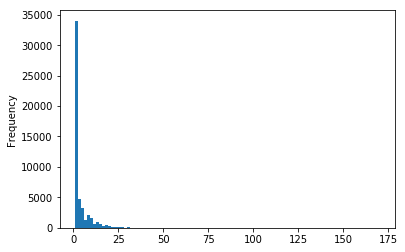

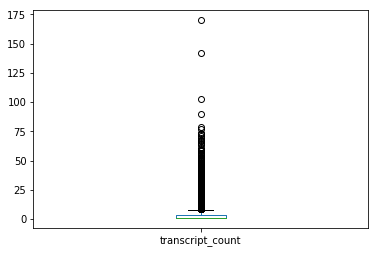


The number of different biotypes is 41

protein_coding                        19297
processed_pseudogene                   9826
lincRNA                                6645
antisense                              5086
unprocessed_pseudogene                 2143
snRNA                                  1802
miRNA                                  1173
misc_RNA                                955
sense_intronic                          686
transcribed_unprocessed_pseudogene      660
rRNA                                    512
processed_transcript                    438
transcribed_processed_pseudogene        425
snoRNA                                  403
sense_overlapping                       174
IG_V_pseudogene                         173
unitary_pseudogene                      141
IG_V_gene                               130
TR_V_gene                                93
TR_J_gene                                71
transcribed_unitary_pseudogene           53
IG_D_gene                          

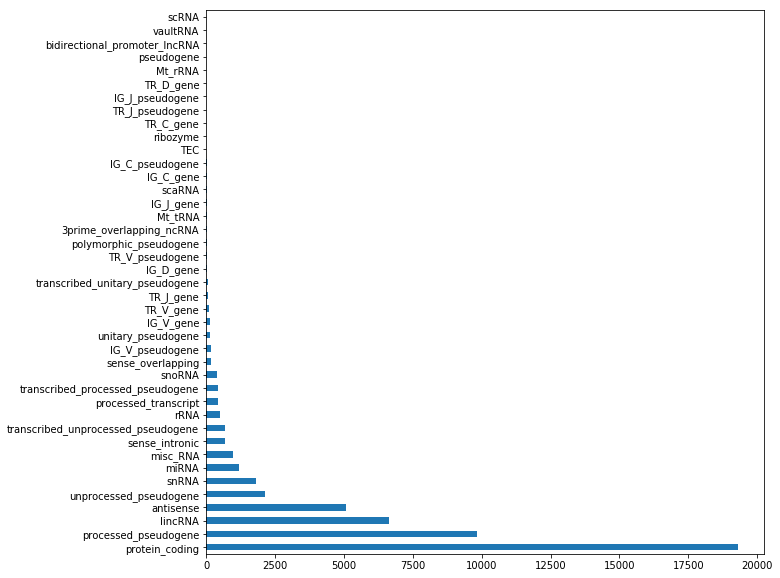

The total number of chromosomes is  25


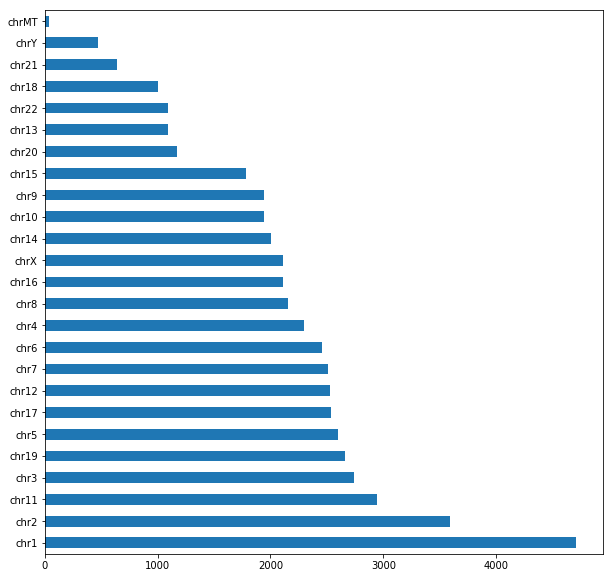

% genes of chr1 on strand +: 50.70
% genes of chr10 on strand +: 51.42
% genes of chr11 on strand +: 49.97
% genes of chr12 on strand +: 49.86
% genes of chr13 on strand +: 49.04
% genes of chr14 on strand +: 51.32
% genes of chr15 on strand +: 50.50
% genes of chr16 on strand +: 50.97
% genes of chr17 on strand +: 48.44
% genes of chr18 on strand +: 50.85
% genes of chr19 on strand +: 51.09
% genes of chr2 on strand +: 50.24
% genes of chr20 on strand +: 49.36
% genes of chr21 on strand +: 46.48
% genes of chr22 on strand +: 53.67
% genes of chr3 on strand +: 49.09
% genes of chr4 on strand +: 50.15
% genes of chr5 on strand +: 50.15
% genes of chr6 on strand +: 49.69
% genes of chr7 on strand +: 52.65
% genes of chr8 on strand +: 48.28
% genes of chr9 on strand +: 50.95
% genes of chrMT on strand +: 75.68
% genes of chrX on strand +: 51.11
% genes of chrY on strand +: 51.06
                                    transcript_count
gene_biotype                                        
3prim

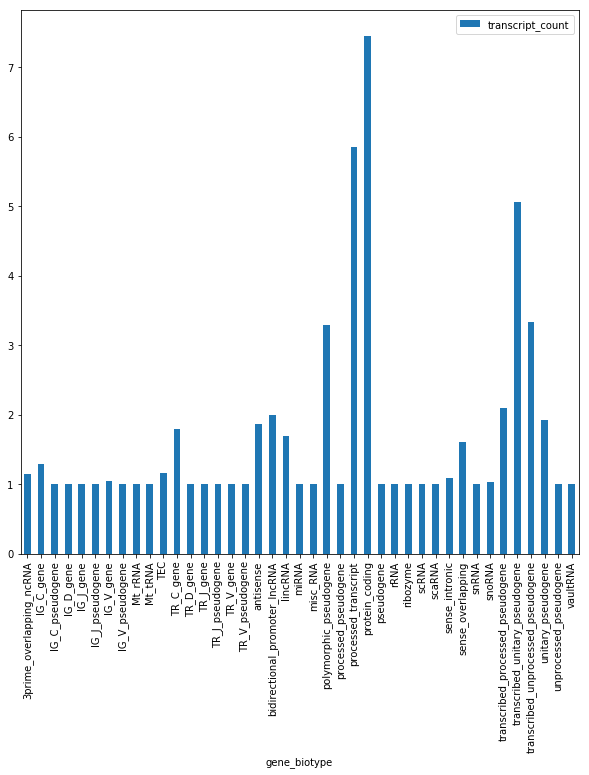

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

genes = pd.read_csv("file_samples/gene_table.csv", sep=",")
print(genes.head())
print("")
#Question 1
print("Total number of genes: {}".format(genes.shape[0]))
#Question 2
maxI = genes["transcript_count"].max()
minI = genes["transcript_count"].min()
avgI = genes["transcript_count"].mean()
medI = genes["transcript_count"].median()
print("")
print("Isoform per gene stats:")
print(" - max: {} min {} avg {} median {}".format(maxI, minI,avgI,medI))

#Question 3
genes["transcript_count"].plot(kind = "hist", bins = 100)
plt.show()
plt.close()
genes["transcript_count"].plot(kind = "box")
plt.show()
print("")
#Question 4
biot = genes["gene_biotype"].value_counts()
print("The number of different biotypes is", len(biot))
print("")
print(biot)
plt.close()
biot.plot(kind = "barh", figsize = (10,10))
plt.show()
#Question 5
chrs = genes["chromosome"].unique()
print("The total number of chromosomes is ", chrs.shape[0])

#Question 6
plt.close()
chrs = genes["chromosome"].value_counts()
chrs.plot(kind = "barh", figsize = (10,10))
plt.show()

#Question 7
#Let's group the data by chromosome and strand
#then loop through all the elements to count the
#total elements per chromosome
#to compute the percentage of the ones that are on + strand
#The totals go on a dictionary with key chr

grp_chrs = genes.groupby(["chromosome", "strand"])
tot_byChr = {}

for ind, grp in grp_chrs:
    v = tot_byChr.get(ind[0],0) 
    tot_byChr[ind[0]] = v + grp.shape[0]
for ind, grp in grp_chrs:
    if (ind[1] == "+"):
        
        print("% genes of {} on strand +: {:.2f}".format(ind[0], 100*grp.shape[0]/tot_byChr[ind[0]]))
        


#Question 8 
biot= grp_chrs = genes.groupby(["gene_biotype"])
biot_transc = biot.aggregate(pd.DataFrame.mean)[["transcript_count"]]
print(biot_transc)

biot_transc.plot(kind = "bar", figsize = (10,10))
plt.show()

</div>

5. Write a function that creates and returns a data frame having columns with the labels specified through a list taken in input and ten rows of random data between 1 and 100. 

    1. Create two random DataFrames one with labels l = ["A", "B", "C" ,"D","E"] and l1 = ["W", "X","Y","Z"] 
    2. Print the first 5 elements to inspect the two DataFrames and plot the valuse of the two DataFrames;
    3. Create a new Series S1 with values: [1, 1, 1, 0, 0, 1, 1, 0, 0, 1]. Get the Series corresponding to the column "C" and multiply it point-to-point by the Series S1 (hint use: Series.multiply(S1))
    4. Add this new series as a "C" column of the second DataFrame.
    5. Merge the two DataFrames based on the value of C. Perform an inner, outer, left and right merge and see the difference 
    


   A  B  C   D  E
0  3  3  4  10  4
1  0  1  6   5  1
2  6  1  8   3  1
3  2  2  9   8  7
4  5  6  0   2  2

    W  X  Y   Z
0   4  0  0   2
1   1  8  5   3
2   9  9  1   1
3  10  3  5  10
4  10  1  8   5


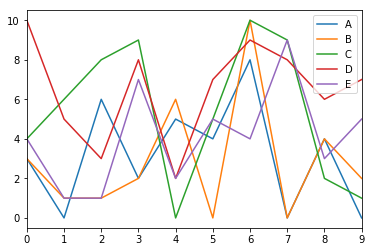

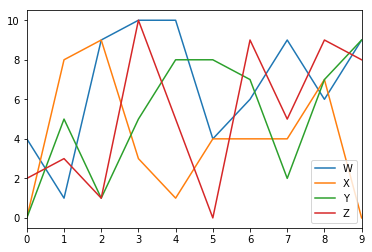

0     4
1     6
2     8
3     0
4     0
5     5
6    10
7     0
8     0
9     1
dtype: int64
    W  X  Y   Z   C
0   4  0  0   2   4
1   1  8  5   3   6
2   9  9  1   1   8
3  10  3  5  10   0
4  10  1  8   5   0
5   4  4  8   0   5
6   6  4  7   9  10
7   9  4  2   5   0
8   6  7  7   9   0
9   9  0  9   8   1
   A   B   C   D  E
0  3   3   4  10  4
1  0   1   6   5  1
2  6   1   8   3  1
3  2   2   9   8  7
4  5   6   0   2  2
5  4   0   5   7  5
6  8  10  10   9  4
7  0   0   9   8  9
8  4   4   2   6  3
9  0   2   1   7  5

Inner Join DF - DF1
   A   B   C   D  E   W  X  Y   Z
0  3   3   4  10  4   4  0  0   2
1  0   1   6   5  1   1  8  5   3
2  6   1   8   3  1   9  9  1   1
3  5   6   0   2  2  10  3  5  10
4  5   6   0   2  2  10  1  8   5
5  5   6   0   2  2   9  4  2   5
6  5   6   0   2  2   6  7  7   9
7  4   0   5   7  5   4  4  8   0
8  8  10  10   9  4   6  4  7   9
9  0   2   1   7  5   9  0  9   8

Outer Join DF - DF1
    A   B   C   D  E     W    X    Y     Z
0   3   

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import random

def createRandomDF(labels):
    """ returns a random dataframe with columns having names equal to the
    input labels"""
    tmp_dict = {}
    for l in labels:
        tmp_dict[l] = []
        for i in range(0,10):
            tmp_dict[l].append(random.randint(0,10))
    
    DF = pd.DataFrame(tmp_dict)
    return DF

#Question 1
l = ["A", "B", "C" ,"D","E"]
l1 = [ "W", "X","Y","Z"] 
df = createRandomDF(l)
df1 = createRandomDF(l1)

#Question 2
print(df.head())
print("")
print(df1.head())
plt.close()
df.plot(kind = "line")
plt.show()
plt.close()
df1.plot(kind = "line")
plt.show()

#Question 3
S1 = pd.Series( [ 1, 1, 1, 0, 0, 1, 1, 0,0,1])
Sc = df["C"]
c1 = Sc.multiply(S1)
print(c1)

#Question 4
df1["C"] = c1
print(df1)
print(df)
#Question 5
inJ = pd.merge(df,df1, how ="inner")
print("")
print("Inner Join DF - DF1")
print(inJ)
outJ = pd.merge(df,df1, how ="outer")
print("")
print("Outer Join DF - DF1")
print(outJ)
print("")
print("Left Join DF - DF1")
lJ = pd.merge(df,df1, on = "C", how ="left")
print(lJ)
print("")
print("Right Join DF - DF1")
rJ = pd.merge(df,df1, on = "C", how ="right")
print(rJ)

</div>